In [1]:
import pandas as pd

In [5]:
week1=pd.read_csv('Restaurant - Week 1 Sales.csv')
week1

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [6]:
week2=pd.read_csv('Restaurant - Week 2 Sales.csv')
week2

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [12]:
customers=pd.read_csv('Restaurant - Customers.csv')
customers

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive
3,4,Steven,Evans,Male,Fatz,Registered Nurse
4,5,Judy,Morrison,Female,Demivee,Legal Assistant
...,...,...,...,...,...,...
995,996,Debra,Garcia,Female,Dazzlesphere,Structural Engineer
996,997,Douglas,Bishop,Male,Livepath,Developer I
997,998,Frank,Franklin,Male,Brainverse,Nurse Practicioner
998,999,Jessica,Burns,Female,Babbleblab,Financial Advisor


week1.head(3)

In [11]:
foods=pd.read_csv('Restaurant - Foods.csv')
foods

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99
3,4,Quesadilla,4.25
4,5,Pizza,2.49
5,6,Pasta,13.99
6,7,Steak,24.99
7,8,Salad,11.25
8,9,Donut,0.99
9,10,Drink,1.75


## The ```pd.concat``` Method

In [14]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [15]:
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


In [16]:
pd.concat(objs=[week1,week2])
#index of week2 preserved week2 0 to 249
#index of week1 0 to 249
#happens bcoz ignore_index=False by default

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [17]:
pd.concat(objs=[week1,week2],ignore_index=True)


,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
495,783,10
496,556,10
497,547,9
498,252,9


In [18]:
week1.append(week2)
#this is deprecated

C:\Users\hp\AppData\Local\Temp\ipykernel_34820\3993835431.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week1.append(week2)


,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [21]:
sales=pd.concat(objs=[week1,week2],keys=['Week1','Week2'])
#multi index dataframe
sales

Customer ID  Food ID
Week1 0            537        9
      1             97        4
      2            658        1
      3            202        2
      4            155        9
...                ...      ...
Week2 245          783       10
      246          556       10
      247          547        9
      248          252        9
      249          249        6

[500 rows x 2 columns]

In [22]:
sales.head(3)

Customer ID  Food ID
Week1 0          537        9
      1           97        4
      2          658        1

In [26]:
sales.loc[('Week1',)]

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9
...,...,...
245,413,9
246,926,6
247,134,3
248,396,6


In [27]:
sales.loc[('Week2',)]

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10
3,189,5
4,267,3
...,...,...
245,783,10
246,556,10
247,547,9
248,252,9


In [28]:
sales.loc[('Week1',240)]

Customer ID    945
Food ID          5
Name: (Week1, 240), dtype: int64

In [29]:
sales.loc[('Week1',240),'Customer ID']

945

In [32]:
sales.loc[('Week1',240),['Customer ID','Food ID']]

Customer ID    945
Food ID          5
Name: (Week1, 240), dtype: int64

In [33]:
sales.loc[('Week2',200)]

Customer ID    751
Food ID          2
Name: (Week2, 200), dtype: int64

## INNER JOINS

```
week1.merge(
    right: 'DataFrame | Series',
    how: 'str' = 'inner',
    on: 'IndexLabel | None' = None,
    left_on: 'IndexLabel | None' = None,
    right_on: 'IndexLabel | None' = None,
    left_index: 'bool' = False,
    right_index: 'bool' = False,
    sort: 'bool' = False,
    suffixes: 'Suffixes' = ('_x', '_y'),
    copy: 'bool' = True,
    indicator: 'bool' = False,
    validate: 'str | None' = None,
) -> 'DataFrame'
Docstring:
Merge DataFrame or named Series objects with a database-style join.
```

In [34]:
#merges two df based on some common value
#customers who came on both weeks
#in both df names should be same
week1.merge(week2,how='inner',on='Customer ID')
#week1 Food ID_x 
#week2 Food ID_y

,Customer ID,Food ID_x,Food ID_y
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [35]:
week1[week1['Customer ID']==155]

,Customer ID,Food ID
4,155,9
17,155,1


In [36]:
week1.merge(week2,how='inner',on='Customer ID',suffixes=['-Week 1','- Week2'])


,Customer ID,Food ID-Week 1,Food ID- Week2
0,537,9,5
1,155,9,3
2,155,1,3
3,503,5,8
4,503,5,9
...,...,...,...
57,945,5,4
58,343,3,5
59,343,3,2
60,343,3,7


In [37]:
#merging based on multiple columns
week1.merge(week2, how='inner',on=['Customer ID','Food ID'])
#why Customer ID 21 and 578 two times?

,Customer ID,Food ID
0,304,3
1,540,3
2,937,10
3,233,3
4,21,4
5,21,4
6,922,1
7,578,5
8,578,5


In [38]:
week1[week1['Customer ID']==21]
#customer with id 21 came two times in week1 and ordered same item

,Customer ID,Food ID
101,21,4
212,21,4


In [39]:
week2[week2['Customer ID']==21]

,Customer ID,Food ID
30,21,4


In [40]:
week1[week1['Customer ID']==578]


,Customer ID,Food ID
224,578,5


In [41]:
week2[week2['Customer ID']==578]


,Customer ID,Food ID
29,578,5
189,578,5


## Outer Joins

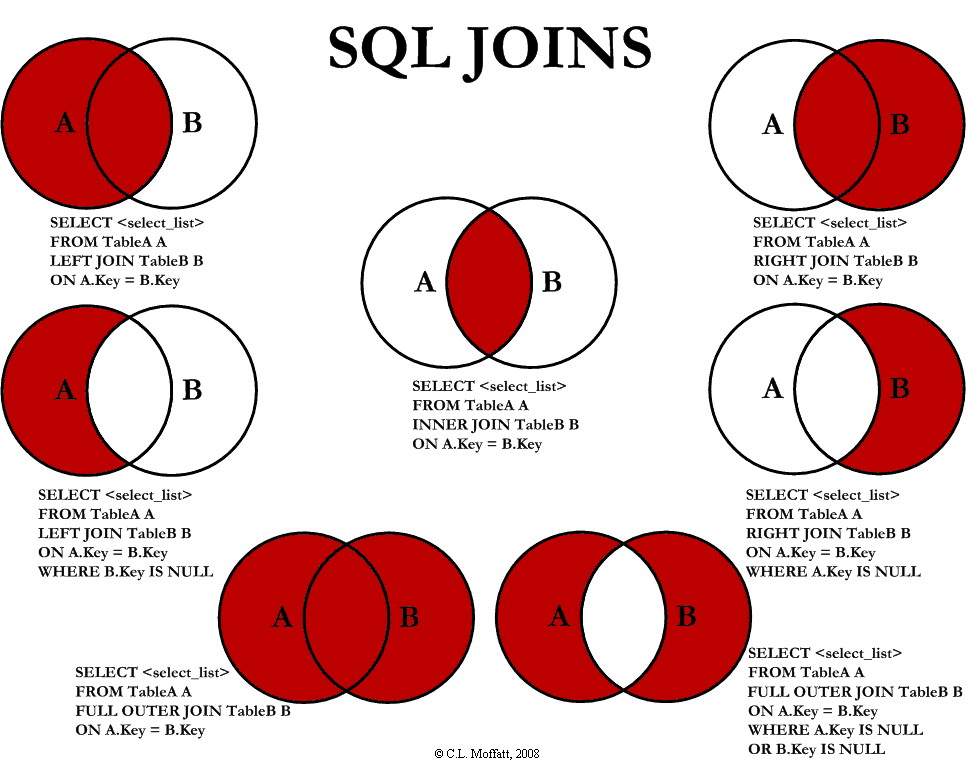

In [46]:
#same as in sql
week1.merge(week2,how='outer',on='Customer ID',suffixes=['- Week 1','- Week 2'])
#person wth Customer ID 97 came in week1 but didn't came in week2

,Customer ID,Food ID- Week 1,Food ID- Week 2
0,537,9.0,5.0
1,97,4.0,NaN
2,658,1.0,NaN
3,202,2.0,NaN
4,155,9.0,3.0
...,...,...,...
449,855,NaN,4.0
450,559,NaN,10.0
451,276,NaN,4.0
452,556,NaN,10.0


In [47]:
len(week1.merge(week2,how='outer',on='Customer ID',suffixes=['- Week 1','- Week 2']))


454

In [49]:
merged=week1.merge(week2,how='outer',on='Customer ID',suffixes=['- Week 1','- Week 2'],indicator=True)
merged

,Customer ID,Food ID- Week 1,Food ID- Week 2,_merge
0,537,9.0,5.0,both
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
4,155,9.0,3.0,both
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


In [51]:
merged['_merge'].value_counts()

right_only    197
left_only     195
both           62
Name: _merge, dtype: int64

In [53]:
merged['_merge'].isin(['left_only','right_only'])

0      False
1       True
2       True
3       True
4      False
       ...  
449     True
450     True
451     True
452     True
453     True
Name: _merge, Length: 454, dtype: bool

In [54]:
mask=merged['_merge'].isin(['left_only','right_only'])
merged[mask]

,Customer ID,Food ID- Week 1,Food ID- Week 2,_merge
1,97,4.0,NaN,left_only
2,658,1.0,NaN,left_only
3,202,2.0,NaN,left_only
6,213,8.0,NaN,left_only
7,600,1.0,NaN,left_only
...,...,...,...,...
449,855,NaN,4.0,right_only
450,559,NaN,10.0,right_only
451,276,NaN,4.0,right_only
452,556,NaN,10.0,right_only


## Left Joins

In [55]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [57]:
foods.head(3)

,Food ID,Food Item,Price
0,1,Sushi,3.99
1,2,Burrito,9.99
2,3,Taco,2.99


In [58]:
week1.merge(foods,how='left',on='Food ID')

,Customer ID,Food ID,Food Item,Price
0,537,9,Donut,0.99
1,97,4,Quesadilla,4.25
2,658,1,Sushi,3.99
3,202,2,Burrito,9.99
4,155,9,Donut,0.99
...,...,...,...,...
245,413,9,Donut,0.99
246,926,6,Pasta,13.99
247,134,3,Taco,2.99
248,396,6,Pasta,13.99


In [59]:
week1.merge(foods,how='left',on='Food ID',sort=True)
#sorts on matching column

,Customer ID,Food ID,Food Item,Price
0,658,1,Sushi,3.99
1,600,1,Sushi,3.99
2,155,1,Sushi,3.99
3,341,1,Sushi,3.99
4,20,1,Sushi,3.99
...,...,...,...,...
245,809,10,Drink,1.75
246,584,10,Drink,1.75
247,274,10,Drink,1.75
248,151,10,Drink,1.75


## The left_on and right_on Parameters

In [60]:
# what happens when we dont have same column names and we want to merge
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [61]:
customers.head(3)

,ID,First Name,Last Name,Gender,Company,Occupation
0,1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
1,2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
2,3,Roger,Black,Male,Tagfeed,Account Executive


In [64]:
week2.merge(customers,how='left',left_on='Customer ID',right_on='ID')

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,688,10,688,Carl,Williamson,Male,Thoughtmix,Graphic Designer
1,813,7,813,Johnny,Walker,Male,Kayveo,Developer II
2,495,10,495,Deborah,Little,Female,Babbleblab,VP Accounting
3,189,5,189,Roger,Gordon,Male,Skilith,Operator
4,267,3,267,Matthew,Wood,Male,Agimba,Product Engineer
...,...,...,...,...,...,...,...,...
245,783,10,783,Phyllis,Meyer,Female,Voolia,Information Systems Manager
246,556,10,556,Samuel,Bailey,Male,Oyoloo,Nurse
247,547,9,547,Tina,Watkins,Female,Thoughtstorm,Accountant II
248,252,9,252,Douglas,Powell,Male,Jetwire,Geologist IV


In [67]:
#drop ID col as same as customers ID
week2.merge(customers,how='left',left_on='Customer ID',right_on='ID',sort=True).drop('ID',axis='columns')

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,8,6,Frances,Adams,Female,Dabshots,Developer III
1,13,2,Ruth,Alvarez,Female,Twitterlist,Mechanical Systems Engineer
2,21,4,Albert,Burns,Male,Rhynoodle,Junior Executive
3,24,8,Donna,Thomas,Female,Jaxbean,Chief Design Engineer
4,27,4,Jessica,Bennett,Female,Twitternation,Account Executive
...,...,...,...,...,...,...,...
245,968,4,Teresa,Reynolds,Female,Flashdog,Budget/Accounting Analyst IV
246,969,3,Marie,Ortiz,Female,Meejo,Research Associate
247,977,7,Cynthia,Dixon,Female,Skalith,Automation Specialist II
248,994,2,Clarence,Morgan,Male,Edgewire,Geologist II


## Merging by indexes with left_index and right_index Parameters

In [68]:
week1_=pd.read_csv('Restaurant - Week 1 Sales.csv')
week2_=pd.read_csv('Restaurant - Week 2 Sales.csv')
customers_idx=pd.read_csv("Restaurant - Customers.csv",index_col='ID')
food_idx=pd.read_csv('Restaurant - Foods.csv',index_col='Food ID')

In [69]:
customers_idx.head(3)

,First Name,Last Name,Gender,Company,Occupation
ID,,,,,
1,Joseph,Perkins,Male,Dynazzy,Community Outreach Specialist
2,Jennifer,Alvarez,Female,DabZ,Senior Quality Engineer
3,Roger,Black,Male,Tagfeed,Account Executive


In [76]:
#merging based on index
sales=week1.merge(customers_idx,how='left',left_on='Customer ID',right_index=True)
sales

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer


In [77]:
sales.merge(food_idx,how='left',left_on='Food ID',right_index=True)

,Customer ID,Food ID,First Name,Last Name,Gender,Company,Occupation,Food Item,Price
0,537,9,Cheryl,Carroll,Female,Zoombeat,Registered Nurse,Donut,0.99
1,97,4,Amanda,Watkins,Female,Ozu,Account Coordinator,Quesadilla,4.25
2,658,1,Patrick,Webb,Male,Browsebug,Community Outreach Specialist,Sushi,3.99
3,202,2,Louis,Campbell,Male,Rhynoodle,Account Representative III,Burrito,9.99
4,155,9,Carolyn,Diaz,Female,Gigazoom,Database Administrator III,Donut,0.99
...,...,...,...,...,...,...,...,...,...
245,413,9,Diane,Bailey,Female,Wikibox,Technical Writer,Donut,0.99
246,926,6,Anne,Wagner,Female,Skyba,Legal Assistant,Pasta,13.99
247,134,3,Diana,Hall,Female,Quinu,Financial Advisor,Taco,2.99
248,396,6,Juan,Romero,Male,Zoonder,Analyst Programmer,Pasta,13.99


In [78]:
week1.head(3)

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1


In [79]:
week2.head(3)

,Customer ID,Food ID
0,688,10
1,813,7
2,495,10


In [81]:
week1.merge(week2,how='left',left_index=True,right_index=True,suffixes=['- Week1','- Week2'])

,Customer ID- Week1,Food ID- Week1,Customer ID- Week2,Food ID- Week2
0,537,9,688,10
1,97,4,813,7
2,658,1,495,10
3,202,2,189,5
4,155,9,267,3
...,...,...,...,...
245,413,9,783,10
246,926,6,556,10
247,134,3,547,9
248,396,6,252,9


## The .join() Method

In [82]:
satisfaction=pd.read_csv('Restaurant - Week 1 Satisfaction.csv')

In [84]:
satisfaction.head(3)

,Satisfaction Rating
0,2
1,7
2,3


In [85]:
week1.merge(satisfaction,how='left',left_index=True,right_index=True)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


In [86]:
#alternative-Requires a lot less code
week1.join(satisfaction)

,Customer ID,Food ID,Satisfaction Rating
0,537,9,2
1,97,4,7
2,658,1,3
3,202,2,7
4,155,9,10
...,...,...,...
245,413,9,1
246,926,6,2
247,134,3,8
248,396,6,10


## The pd.merge() Method

In [87]:
#we called merge method directly on dataframe
#we can also call directly on pandas
pd.merge(week1,customers,how='left',left_on='Customer ID',right_on='ID')

,Customer ID,Food ID,ID,First Name,Last Name,Gender,Company,Occupation
0,537,9,537,Cheryl,Carroll,Female,Zoombeat,Registered Nurse
1,97,4,97,Amanda,Watkins,Female,Ozu,Account Coordinator
2,658,1,658,Patrick,Webb,Male,Browsebug,Community Outreach Specialist
3,202,2,202,Louis,Campbell,Male,Rhynoodle,Account Representative III
4,155,9,155,Carolyn,Diaz,Female,Gigazoom,Database Administrator III
...,...,...,...,...,...,...,...,...
245,413,9,413,Diane,Bailey,Female,Wikibox,Technical Writer
246,926,6,926,Anne,Wagner,Female,Skyba,Legal Assistant
247,134,3,134,Diana,Hall,Female,Quinu,Financial Advisor
248,396,6,396,Juan,Romero,Male,Zoonder,Analyst Programmer
